## Introduction

In this Jupyter notebook, I tried to add some random noises that corrupt the original image so it would lead the classifier to missclassify the images. I have two main random noises: 1) np.random from np library, 2) random_noise function from skimage library. I uses a normal distribution for creating the random noise using 1) np.random. In particular, I uses np.random.normal with noise_factor from 0 to 1, mean at 0, and standard deviation of 1. I also create random noises using the skimage library. In particular, I uses modes including salt and pepper, poisson, and speckle. The overall accuracy for all the random noise shows that they only range from 9% to approximately 11%. This indicates that the accuracy is close to a random 1 out of 10 chances. 

## Code

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math

In [3]:
tf.__version__

'2.8.0'

In [5]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

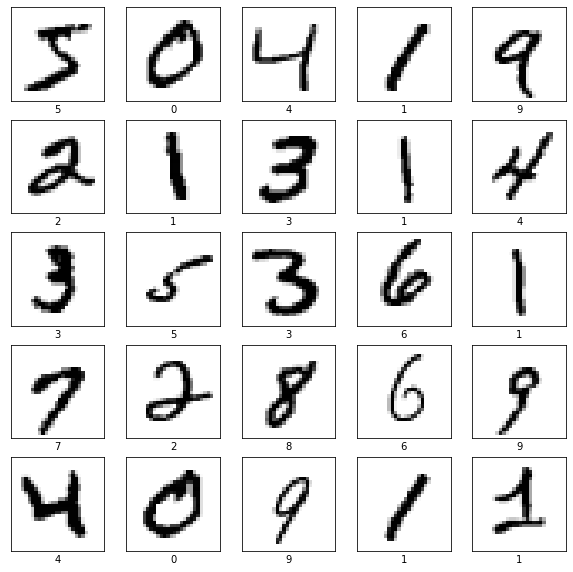

In [6]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_images = train_images.reshape(train_images.shape[0], 28, 28)

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
test_images[0:12]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Text(0.5, 1.0, 'Ground Truth : 7')

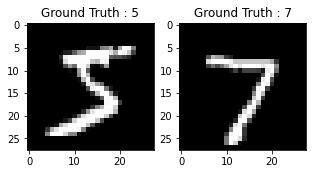

In [12]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [13]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [14]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.
test_images = test_images / 255.

## One hot encoded vector

In [15]:
from tensorflow.keras.utils import to_categorical
# Change the labels from categorical to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Display the change for category label using one-hot encoding
print('Original label:', train_labels[0])
print('After conversion to one-hot:', train_labels_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [17]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_images, train_labels_one_hot, test_size=0.1, random_state=13)

## CNN Model

In [18]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [19]:
batch_size = 64
epochs = 10
num_classes = 10

In [20]:
mnist_model = Sequential()
mnist_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
mnist_model.add(MaxPooling2D((2, 2),padding='same'))
mnist_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
mnist_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mnist_model.add(Flatten())
mnist_model.add(Dense(128, activation='linear'))
mnist_model.add(Dense(num_classes, activation='softmax'))

2022-07-26 19:06:22.590115: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:

mnist_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [22]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [23]:
mnist_train = mnist_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/10
844/844 [==============================] - 32s 38ms/step - loss: 0.1509 - accuracy: 0.9549 - val_loss: 0.0723 - val_accuracy: 0.9768
Epoch 2/10
844/844 [==============================] - 29s 34ms/step - loss: 0.0611 - accuracy: 0.9812 - val_loss: 0.0524 - val_accuracy: 0.9832
Epoch 3/10
844/844 [==============================] - 30s 35ms/step - loss: 0.0461 - accuracy: 0.9860 - val_loss: 0.0552 - val_accuracy: 0.9850
Epoch 4/10
844/844 [==============================] - 29s 35ms/step - loss: 0.0389 - accuracy: 0.9878 - val_loss: 0.0639 - val_accuracy: 0.9813
Epoch 5/10
844/844 [==============================] - 30s 35ms/step - loss: 0.0325 - accuracy: 0.9892 - val_loss: 0.0783 - val_accuracy: 0.9778
Epoch 6/10
844/844 [==============================] - 30s 35ms/step - loss: 0.0290 - accuracy: 0.9907 - val_loss: 0.0673 - val_accuracy: 0.9808
Epoch 7/10
844/844 [==============================] - 30s 35ms/step - loss: 0.0243 - accuracy: 0.9921 - val_loss: 0.0630 - val_accuracy:

In [22]:
test_eval = mnist_model.evaluate(test_images, test_labels_one_hot, verbose=0)

In [37]:
test_eval = mnist_model.evaluate(test_images, test_labels_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.0704551413655281
Test accuracy: 0.9829999804496765


## visulization

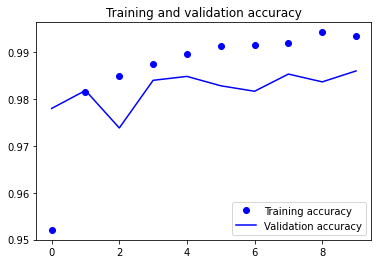

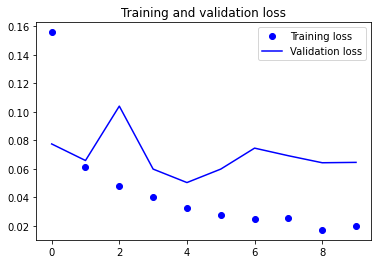

In [24]:
accuracy = mnist_train.history['accuracy']
val_accuracy = mnist_train.history['val_accuracy']
loss = mnist_train.history['loss']
val_loss = mnist_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Images correctly classified and misclassified

In [25]:
predicted_classes = mnist_model.predict(test_images)

In [26]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

Found 9828 correct labels


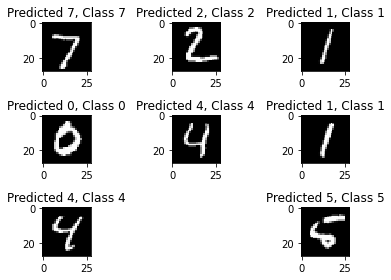

In [27]:
correct = np.where(predicted_classes==test_labels)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_labels[correct]))
    plt.tight_layout()

Found 172 incorrect labels


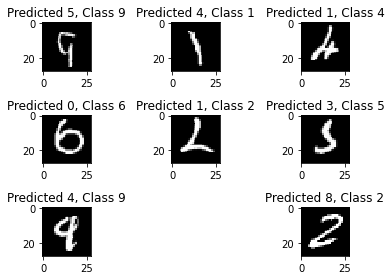

In [28]:
incorrect = np.where(predicted_classes!=test_labels)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_labels[incorrect]))
    plt.tight_layout()

In [40]:
train_images_new = train_images/255

In [41]:
train_images_new.shape

(60000, 28, 28, 1)

In [277]:
test_images_new = test_images/255

In [278]:
test_images_new.shape

(10000, 28, 28)

In [77]:
# import noise layer
from keras.layers import GaussianNoise
# define noise layer
layer = GaussianNoise(0.2)

In [78]:
noisey = layer(test_images[0:2], training = True)

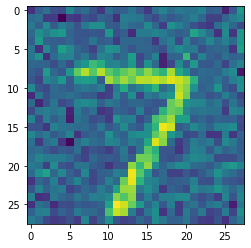

In [79]:
plt.imshow(noisey[0])

# Attempt 0: denoise 0.5

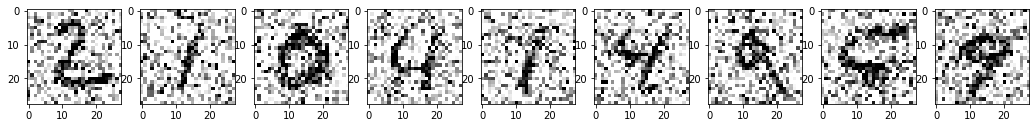

In [144]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

(x_train, label1), (x_test, label2) = mnist.load_data()

# Normalize it to 0-1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#adding some noise
noise_factor = 0.5
#ramdom noise from normal distribution with mean at 0 and std dev of 1
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
#Clip all values to 0-1 [to stretch it]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()




In [145]:
model_denoise = Sequential()
# encode
model_denoise.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model_denoise.add(MaxPooling2D((2, 2), padding='same'))
model_denoise.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model_denoise.add(MaxPooling2D((2, 2), padding='same'))
model_denoise.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 
# decode
model_denoise.add(MaxPooling2D((2, 2), padding='same'))
 
model_denoise.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model_denoise.add(UpSampling2D((2, 2)))
model_denoise.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model_denoise.add(UpSampling2D((2, 2)))
model_denoise.add(Conv2D(32, (3, 3), activation='relu'))
model_denoise.add(UpSampling2D((2, 2)))
model_denoise.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model_denoise.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

model_denoise.summary()





Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_70 (Conv2D)          (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_71 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 4, 4, 8)        

In [146]:
model_denoise.fit(x_train_noisy, label1, epochs=10, batch_size=batch_size, verbose=1,
          validation_data=(x_test_noisy, label2))
# mnist_train = mnist_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,
#                               validation_data=(valid_X, valid_label))

Epoch 1/10
938/938 [==============================] - 98s 103ms/step - loss: 9.1393 - accuracy: 0.1121 - val_loss: 8.4157 - val_accuracy: 0.1135
Epoch 2/10
938/938 [==============================] - 92s 98ms/step - loss: 8.4527 - accuracy: 0.1124 - val_loss: 8.4586 - val_accuracy: 0.1135
Epoch 3/10
938/938 [==============================] - 94s 100ms/step - loss: 8.4144 - accuracy: 0.1124 - val_loss: 8.3933 - val_accuracy: 0.1135
Epoch 4/10
938/938 [==============================] - 92s 98ms/step - loss: 8.3964 - accuracy: 0.1124 - val_loss: 8.3903 - val_accuracy: 0.1135
Epoch 5/10
938/938 [==============================] - 90s 96ms/step - loss: 8.3824 - accuracy: 0.1124 - val_loss: 8.4080 - val_accuracy: 0.1135
Epoch 6/10
938/938 [==============================] - 89s 95ms/step - loss: 8.3777 - accuracy: 0.1124 - val_loss: 8.5115 - val_accuracy: 0.1135
Epoch 7/10
938/938 [==============================] - 90s 96ms/step - loss: 8.3850 - accuracy: 0.1124 - val_loss: 8.3968 - val_accurac

313/313 [==============================] - 2s 6ms/step - loss: 17.5705 - accuracy: 0.0072
INFO:tensorflow:Assets written to: denoising_autoencoder.model/assets


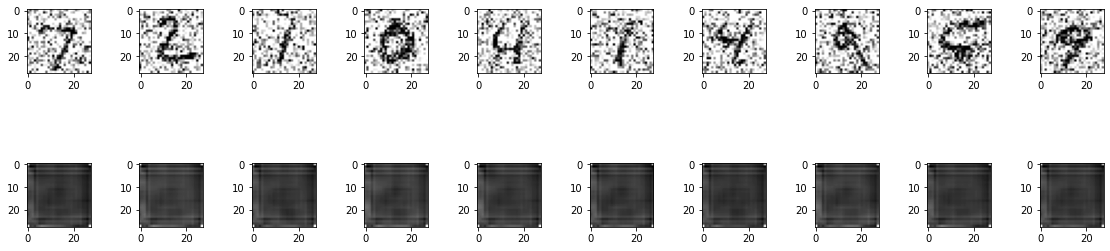

In [147]:
model_denoise.evaluate(x_test_noisy, x_test)
no_noise_img = model_denoise.predict(x_test_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()

## Attempt 1: noise with 0.5, Test accuracy: 0.10270000249147415

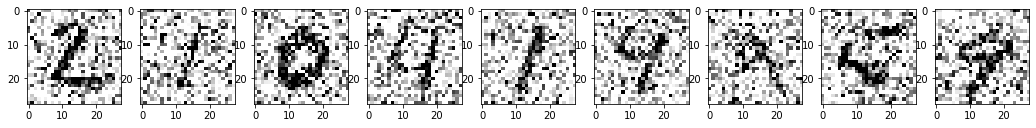

In [149]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize it to 0-1
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.
train_images = np.reshape(train_images, (len(train_images), 28, 28, 1))
test_images = np.reshape(test_images, (len(test_images), 28, 28, 1))

#adding some noise
noise_factor = 0.5
#ramdom noise from normal distribution with mean at 0 and std dev of 1
train_images_noisy = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
test_images_noisy = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
#Clip all values to 0-1 [to stretch it]
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
plt.show()





In [151]:
mnist_model_05 = Sequential()
mnist_model_05.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
mnist_model_05.add(MaxPooling2D((2, 2),padding='same'))
mnist_model_05.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
mnist_model_05.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mnist_model_05.add(Flatten())
mnist_model_05.add(Dense(128, activation='linear'))
mnist_model_05.add(Dense(num_classes, activation='softmax'))

mnist_model_05.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

mnist_model_05.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_79 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 3136)              0         
                                                                 
 dense_22 (Dense)            (None, 128)             

In [152]:
mnist_model_05.fit(train_images_noisy, train_labels, epochs=10, verbose=1,
                   validation_data=(test_images_noisy, test_labels), batch_size=128)

Epoch 1/10
469/469 [==============================] - 23s 47ms/step - loss: 27.3045 - accuracy: 0.0985 - val_loss: 27.2503 - val_accuracy: 0.0999
Epoch 2/10
469/469 [==============================] - 24s 52ms/step - loss: 27.3045 - accuracy: 0.0992 - val_loss: 27.2503 - val_accuracy: 0.1026
Epoch 3/10
469/469 [==============================] - 25s 53ms/step - loss: 27.3045 - accuracy: 0.1004 - val_loss: 27.2503 - val_accuracy: 0.1078
Epoch 4/10
469/469 [==============================] - 27s 59ms/step - loss: 27.3045 - accuracy: 0.1008 - val_loss: 27.2503 - val_accuracy: 0.1018
Epoch 5/10
469/469 [==============================] - 23s 49ms/step - loss: 27.3044 - accuracy: 0.1013 - val_loss: 27.2503 - val_accuracy: 0.0994
Epoch 6/10
469/469 [==============================] - 22s 47ms/step - loss: 27.3045 - accuracy: 0.1000 - val_loss: 27.2503 - val_accuracy: 0.1028
Epoch 7/10
469/469 [==============================] - 25s 53ms/step - loss: 27.3044 - accuracy: 0.1001 - val_loss: 27.2503 -

313/313 [==============================] - 1s 4ms/step - loss: 27.2503 - accuracy: 0.1027


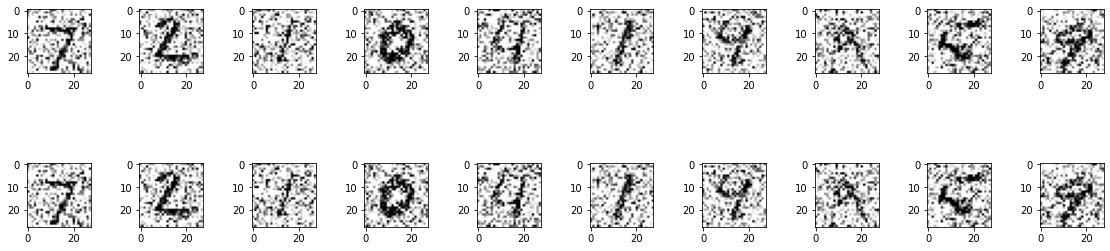

In [153]:
mnist_model_05.evaluate(test_images_noisy,  test_labels)
no_noise_img = mnist_model_05.predict(test_images_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image no_noise_img
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary") 

plt.show()

In [154]:
test_eval = mnist_model_05.evaluate(test_images_noisy,  test_labels, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 27.25031280517578
Test accuracy: 0.10270000249147415


# Attempt 2: noise with 0.25, Test accuracy: 0.10580000281333923

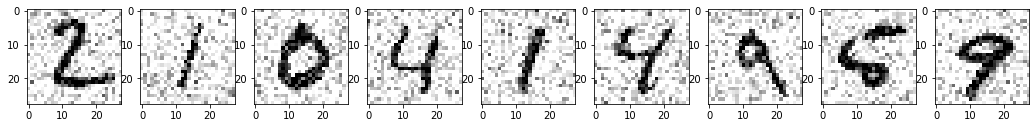

In [156]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize it to 0-1
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.
train_images = np.reshape(train_images, (len(train_images), 28, 28, 1))
test_images = np.reshape(test_images, (len(test_images), 28, 28, 1))

#adding some noise
noise_factor = 0.25
#ramdom noise from normal distribution with mean at 0 and std dev of 1
train_images_noisy = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
test_images_noisy = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
#Clip all values to 0-1 [to stretch it]
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
plt.show()





In [157]:
mnist_model_025 = Sequential()
mnist_model_025.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
mnist_model_025.add(MaxPooling2D((2, 2),padding='same'))
mnist_model_025.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
mnist_model_025.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mnist_model_025.add(Flatten())
mnist_model_025.add(Dense(128, activation='linear'))
mnist_model_025.add(Dense(num_classes, activation='softmax'))

# mnist_model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
mnist_model_025.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

mnist_model_025.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_81 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 3136)              0         
                                                                 
 dense_24 (Dense)            (None, 128)             

In [158]:
# mnist_model_05.fit(train_images_noisy, test_images, epochs=10, batch_size=batch_size, 
#           validation_data=(x_test_noisy, label2))

mnist_model_025.fit(train_images_noisy, train_labels, epochs=10, verbose=1,
                   validation_data=(test_images_noisy, test_labels), batch_size=128)
# mnist_train = mnist_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,
#                               validation_data=(valid_X, valid_label))

Epoch 1/10
469/469 [==============================] - 24s 49ms/step - loss: 27.3045 - accuracy: 0.0990 - val_loss: 27.2503 - val_accuracy: 0.1001
Epoch 2/10
469/469 [==============================] - 25s 54ms/step - loss: 27.3045 - accuracy: 0.0999 - val_loss: 27.2503 - val_accuracy: 0.0971
Epoch 3/10
469/469 [==============================] - 26s 55ms/step - loss: 27.3045 - accuracy: 0.0984 - val_loss: 27.2503 - val_accuracy: 0.0961
Epoch 4/10
469/469 [==============================] - 24s 52ms/step - loss: 27.3045 - accuracy: 0.0991 - val_loss: 27.2503 - val_accuracy: 0.1013
Epoch 5/10
469/469 [==============================] - 24s 51ms/step - loss: 27.3044 - accuracy: 0.0987 - val_loss: 27.2503 - val_accuracy: 0.1023
Epoch 6/10
469/469 [==============================] - 24s 52ms/step - loss: 27.3045 - accuracy: 0.0997 - val_loss: 27.2503 - val_accuracy: 0.0992
Epoch 7/10
469/469 [==============================] - 23s 49ms/step - loss: 27.3045 - accuracy: 0.0975 - val_loss: 27.2503 -

313/313 [==============================] - 1s 4ms/step - loss: 27.2503 - accuracy: 0.1058


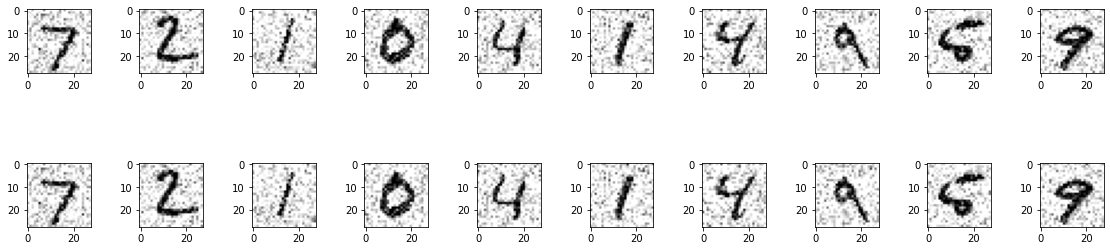

In [159]:

mnist_model_025.evaluate(test_images_noisy,  test_labels)
no_noise_img = mnist_model_025.predict(test_images_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")

plt.show()

In [160]:
test_eval = mnist_model_025.evaluate(test_images_noisy,  test_labels, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 27.25031280517578
Test accuracy: 0.10580000281333923


## Attempt 3: 0.75 Test accuracy: 0.0957999974489212

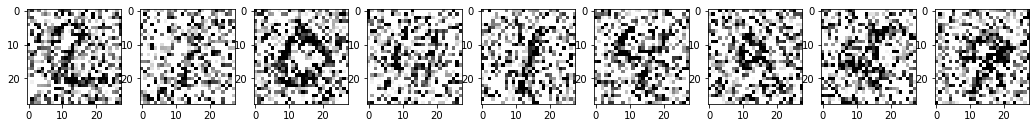

In [161]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize it to 0-1
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.
train_images = np.reshape(train_images, (len(train_images), 28, 28, 1))
test_images = np.reshape(test_images, (len(test_images), 28, 28, 1))

#adding some noise
noise_factor = 0.75
#ramdom noise from normal distribution with mean at 0 and std dev of 1
train_images_noisy = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
test_images_noisy = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
#Clip all values to 0-1 [to stretch it]
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
plt.show()


In [162]:
mnist_model_075 = Sequential()
mnist_model_075.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
mnist_model_075.add(MaxPooling2D((2, 2),padding='same'))
mnist_model_075.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
mnist_model_075.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mnist_model_075.add(Flatten())
mnist_model_075.add(Dense(128, activation='linear'))
mnist_model_075.add(Dense(num_classes, activation='softmax'))

mnist_model_075.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

mnist_model_075.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_82 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_83 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 3136)              0         
                                                                 
 dense_26 (Dense)            (None, 128)             

In [163]:
mnist_model_075.fit(train_images_noisy, train_labels, epochs=10, verbose=1,
                   validation_data=(test_images_noisy, test_labels), batch_size=128)

Epoch 1/10
469/469 [==============================] - 22s 46ms/step - loss: 27.3045 - accuracy: 0.1023 - val_loss: 27.2503 - val_accuracy: 0.1020
Epoch 2/10
469/469 [==============================] - 23s 50ms/step - loss: 27.3044 - accuracy: 0.1016 - val_loss: 27.2503 - val_accuracy: 0.1006
Epoch 3/10
469/469 [==============================] - 26s 56ms/step - loss: 27.3044 - accuracy: 0.1008 - val_loss: 27.2503 - val_accuracy: 0.1052
Epoch 4/10
469/469 [==============================] - 24s 52ms/step - loss: 27.3045 - accuracy: 0.1014 - val_loss: 27.2503 - val_accuracy: 0.1017
Epoch 5/10
469/469 [==============================] - 22s 48ms/step - loss: 27.3045 - accuracy: 0.1012 - val_loss: 27.2503 - val_accuracy: 0.1000
Epoch 6/10
469/469 [==============================] - 22s 47ms/step - loss: 27.3045 - accuracy: 0.1008 - val_loss: 27.2503 - val_accuracy: 0.0994
Epoch 7/10
469/469 [==============================] - 24s 50ms/step - loss: 27.3045 - accuracy: 0.1017 - val_loss: 27.2503 -

313/313 [==============================] - 1s 4ms/step - loss: 27.2503 - accuracy: 0.0958


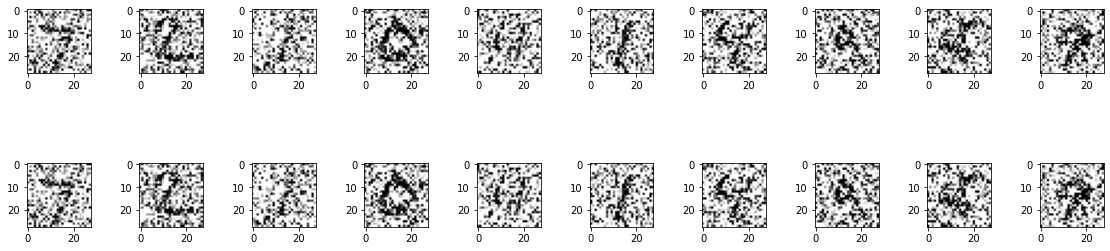

In [164]:

mnist_model_075.evaluate(test_images_noisy,  test_labels)
no_noise_img = mnist_model_075.predict(test_images_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")

plt.show()

In [165]:
test_eval = mnist_model_075.evaluate(test_images_noisy,  test_labels, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 27.25031280517578
Test accuracy: 0.0957999974489212


# Attempt 4:  mean 0.5, std 0.3, Test accuracy: 0.09860000014305115

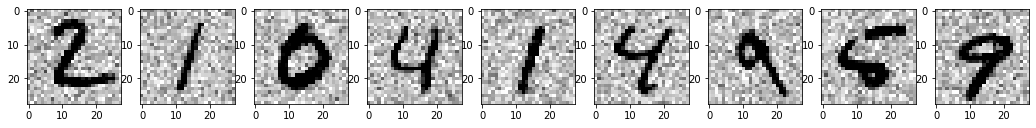

In [178]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize it to 0-1
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.
train_images = np.reshape(train_images, (len(train_images), 28, 28, 1))
test_images = np.reshape(test_images, (len(test_images), 28, 28, 1))

#adding some noise
noise_factor = 0.5
#ramdom noise from normal distribution with mean at 0 and std dev of 1
train_images_noisy = train_images + noise_factor * np.random.normal(loc=0.5, scale=0.3, size=x_train.shape) 
test_images_noisy = test_images + noise_factor * np.random.normal(loc=0.5, scale=0.3, size=x_test.shape) 
#Clip all values to 0-1 [to stretch it]
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

In [179]:
mnist_model_0503 = Sequential()
mnist_model_0503.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
mnist_model_0503.add(MaxPooling2D((2, 2),padding='same'))
mnist_model_0503.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
mnist_model_0503.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mnist_model_0503.add(Flatten())
mnist_model_0503.add(Dense(128, activation='linear'))
mnist_model_0503.add(Dense(num_classes, activation='softmax'))

# mnist_model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
mnist_model_0503.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

mnist_model_0503.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_88 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_89 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 3136)              0         
                                                                 
 dense_32 (Dense)            (None, 128)             

In [180]:
mnist_model_0503.fit(train_images_noisy, train_labels, epochs=10, verbose=1,
                   validation_data=(test_images_noisy, test_labels), batch_size=128)

Epoch 1/10
469/469 [==============================] - 23s 48ms/step - loss: 27.3045 - accuracy: 0.1011 - val_loss: 27.2503 - val_accuracy: 0.1010
Epoch 2/10
469/469 [==============================] - 24s 50ms/step - loss: 27.3045 - accuracy: 0.0981 - val_loss: 27.2503 - val_accuracy: 0.1026
Epoch 3/10
469/469 [==============================] - 26s 56ms/step - loss: 27.3045 - accuracy: 0.0989 - val_loss: 27.2503 - val_accuracy: 0.1002
Epoch 4/10
469/469 [==============================] - 24s 52ms/step - loss: 27.3045 - accuracy: 0.0993 - val_loss: 27.2503 - val_accuracy: 0.1025
Epoch 5/10
469/469 [==============================] - 24s 51ms/step - loss: 27.3045 - accuracy: 0.0985 - val_loss: 27.2503 - val_accuracy: 0.1002
Epoch 6/10
469/469 [==============================] - 24s 51ms/step - loss: 27.3045 - accuracy: 0.0998 - val_loss: 27.2503 - val_accuracy: 0.0988
Epoch 7/10
469/469 [==============================] - 24s 51ms/step - loss: 27.3045 - accuracy: 0.0997 - val_loss: 27.2503 -

313/313 [==============================] - 1s 4ms/step - loss: 27.2503 - accuracy: 0.0986


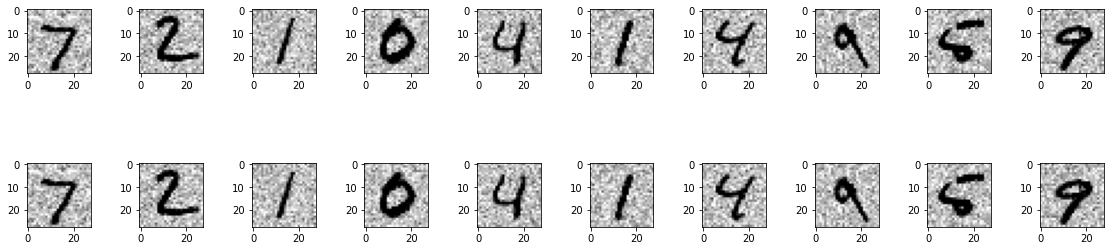

In [181]:

mnist_model_0503.evaluate(test_images_noisy,  test_labels)
no_noise_img = mnist_model_0503.predict(test_images_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")

plt.show()

In [182]:
test_eval = mnist_model_0503.evaluate(test_images_noisy,  test_labels, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 27.25031280517578
Test accuracy: 0.09860000014305115


# Attempt 5: Salt and Pepper  0.01 accuracy: 0.0980

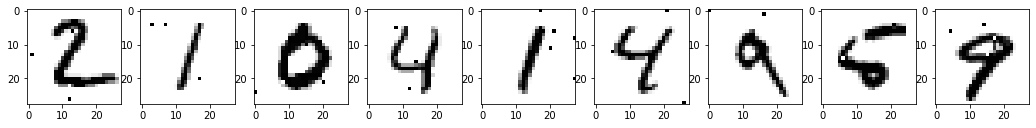

In [217]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize it to 0-1
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.
train_images = np.reshape(train_images, (len(train_images), 28, 28))
test_images = np.reshape(test_images, (len(test_images), 28, 28))

#adding some noise
from skimage.util import random_noise
train_images_noisy= random_noise(train_images, mode='s&p',amount=0.01)
test_images_noisy = random_noise(test_images, mode='s&p',amount=0.01)

#Clip all values to 0-1 [to stretch it]
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
plt.show()


In [218]:
mnist_model_sp001 = Sequential()
mnist_model_sp001.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
mnist_model_sp001.add(MaxPooling2D((2, 2),padding='same'))
mnist_model_sp001.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
mnist_model_sp001.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mnist_model_sp001.add(Flatten())
mnist_model_sp001.add(Dense(128, activation='linear'))
mnist_model_sp001.add(Dense(num_classes, activation='softmax'))

mnist_model_sp001.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

mnist_model_sp001.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_99 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 3136)              0         
                                                                 
 dense_42 (Dense)            (None, 128)             

In [219]:
mnist_model_sp001.fit(train_images_noisy, train_labels, epochs=10, verbose=1,
                   validation_data=(test_images_noisy, test_labels), batch_size=128)

Epoch 1/10
469/469 [==============================] - 26s 55ms/step - loss: 27.3045 - accuracy: 0.1003 - val_loss: 27.2503 - val_accuracy: 0.1044
Epoch 2/10
469/469 [==============================] - 26s 55ms/step - loss: 27.3045 - accuracy: 0.1016 - val_loss: 27.2503 - val_accuracy: 0.0990
Epoch 3/10
469/469 [==============================] - 25s 53ms/step - loss: 27.3045 - accuracy: 0.1013 - val_loss: 27.2503 - val_accuracy: 0.1012
Epoch 4/10
469/469 [==============================] - 25s 52ms/step - loss: 27.3045 - accuracy: 0.0997 - val_loss: 27.2503 - val_accuracy: 0.0980
Epoch 5/10
469/469 [==============================] - 25s 53ms/step - loss: 27.3045 - accuracy: 0.0994 - val_loss: 27.2503 - val_accuracy: 0.1019
Epoch 6/10
469/469 [==============================] - 25s 53ms/step - loss: 27.3044 - accuracy: 0.0978 - val_loss: 27.2503 - val_accuracy: 0.1010
Epoch 7/10
469/469 [==============================] - 25s 52ms/step - loss: 27.3045 - accuracy: 0.0993 - val_loss: 27.2503 -

313/313 [==============================] - 2s 5ms/step - loss: 27.2503 - accuracy: 0.0980


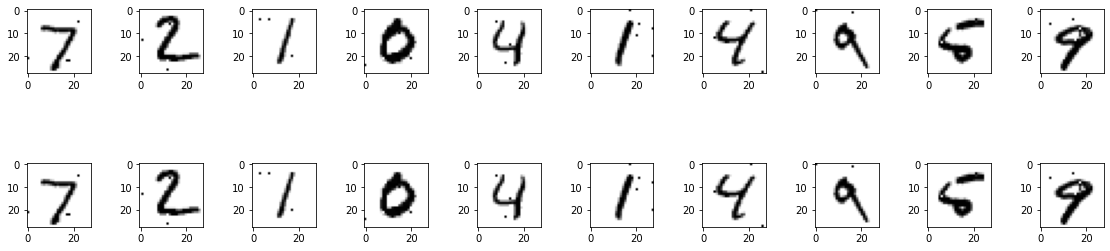

In [220]:

mnist_model_sp001.evaluate(test_images_noisy,  test_labels)
no_noise_img = mnist_model_sp001.predict(test_images_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")

plt.show()

# Attempt 6: Salt and Pepper  0.7 accuracy: 0.1004

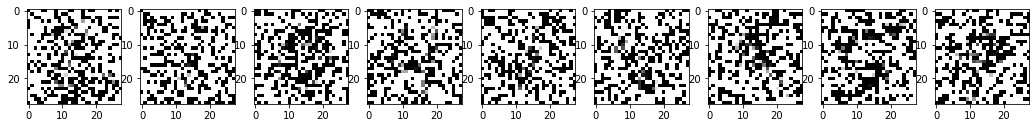

<Figure size 432x288 with 0 Axes>

In [213]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize it to 0-1
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.
train_images = np.reshape(train_images, (len(train_images), 28, 28))
test_images = np.reshape(test_images, (len(test_images), 28, 28))

#adding some noise
from skimage.util import random_noise
train_images_noisy= random_noise(train_images, mode='s&p',amount=0.7)
test_images_noisy = random_noise(test_images, mode='s&p',amount=0.7)
 
#Clip all values to 0-1 [to stretch it]
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
plt.show()
plt.savefig("s&p07.png")

In [214]:
mnist_model_sp07 = Sequential()
mnist_model_sp07.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
mnist_model_sp07.add(MaxPooling2D((2, 2),padding='same'))
mnist_model_sp07.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
mnist_model_sp07.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mnist_model_sp07.add(Flatten())
mnist_model_sp07.add(Dense(128, activation='linear'))
mnist_model_sp07.add(Dense(num_classes, activation='softmax'))

mnist_model_sp07.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

mnist_model_sp07.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_96 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_97 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 3136)              0         
                                                                 
 dense_40 (Dense)            (None, 128)             

In [215]:
mnist_model_sp07.fit(train_images_noisy, train_labels, epochs=10, verbose=1,
                   validation_data=(test_images_noisy, test_labels), batch_size=128)

Epoch 1/10
469/469 [==============================] - 26s 54ms/step - loss: 27.3046 - accuracy: 0.1005 - val_loss: 27.2503 - val_accuracy: 0.1005
Epoch 2/10
469/469 [==============================] - 26s 55ms/step - loss: 27.3045 - accuracy: 0.1022 - val_loss: 27.2503 - val_accuracy: 0.1027
Epoch 3/10
469/469 [==============================] - 26s 56ms/step - loss: 27.3045 - accuracy: 0.1020 - val_loss: 27.2503 - val_accuracy: 0.1008
Epoch 4/10
469/469 [==============================] - 26s 55ms/step - loss: 27.3044 - accuracy: 0.1018 - val_loss: 27.2503 - val_accuracy: 0.0999
Epoch 5/10
469/469 [==============================] - 25s 53ms/step - loss: 27.3045 - accuracy: 0.1033 - val_loss: 27.2503 - val_accuracy: 0.1034
Epoch 6/10
469/469 [==============================] - 25s 53ms/step - loss: 27.3045 - accuracy: 0.1013 - val_loss: 27.2503 - val_accuracy: 0.1005
Epoch 7/10
469/469 [==============================] - 24s 52ms/step - loss: 27.3045 - accuracy: 0.1009 - val_loss: 27.2503 -

313/313 [==============================] - 1s 5ms/step - loss: 27.2503 - accuracy: 0.1004


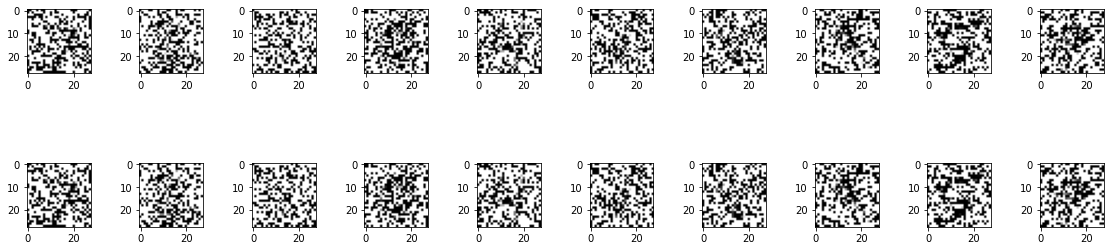

In [216]:

mnist_model_sp07.evaluate(test_images_noisy,  test_labels)
no_noise_img = mnist_model_sp07.predict(test_images_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")

plt.show()

# Attempt 7: Salt and Pepper  0.3 accuracy: 0.0900

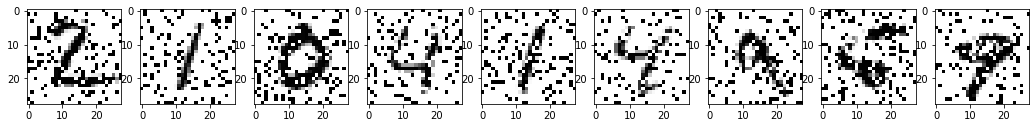

In [221]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize it to 0-1
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.
train_images = np.reshape(train_images, (len(train_images), 28, 28))
test_images = np.reshape(test_images, (len(test_images), 28, 28))

#adding some noise
from skimage.util import random_noise
train_images_noisy= random_noise(train_images, mode='s&p',amount=0.3)
test_images_noisy = random_noise(test_images, mode='s&p',amount=0.3)

#Clip all values to 0-1 [to stretch it]
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

In [222]:
mnist_model_sp03 = Sequential()
mnist_model_sp03.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
mnist_model_sp03.add(MaxPooling2D((2, 2),padding='same'))
mnist_model_sp03.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
mnist_model_sp03.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mnist_model_sp03.add(Flatten())
mnist_model_sp03.add(Dense(128, activation='linear'))
mnist_model_sp03.add(Dense(num_classes, activation='softmax'))

mnist_model_sp03.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

mnist_model_sp03.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_100 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_101 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_22 (Flatten)        (None, 3136)              0         
                                                                 
 dense_44 (Dense)            (None, 128)             

In [223]:
mnist_model_sp03.fit(train_images_noisy, train_labels, epochs=10, verbose=1,
                   validation_data=(test_images_noisy, test_labels), batch_size=128)

Epoch 1/10
469/469 [==============================] - 27s 56ms/step - loss: 27.3046 - accuracy: 0.0986 - val_loss: 27.2503 - val_accuracy: 0.0988
Epoch 2/10
469/469 [==============================] - 26s 56ms/step - loss: 27.3045 - accuracy: 0.0984 - val_loss: 27.2503 - val_accuracy: 0.0982
Epoch 3/10
469/469 [==============================] - 26s 55ms/step - loss: 27.3045 - accuracy: 0.0993 - val_loss: 27.2503 - val_accuracy: 0.0982
Epoch 4/10
469/469 [==============================] - 26s 56ms/step - loss: 27.3045 - accuracy: 0.1001 - val_loss: 27.2503 - val_accuracy: 0.0963
Epoch 5/10
469/469 [==============================] - 26s 54ms/step - loss: 27.3044 - accuracy: 0.1000 - val_loss: 27.2503 - val_accuracy: 0.0985
Epoch 6/10
469/469 [==============================] - 25s 54ms/step - loss: 27.3045 - accuracy: 0.0997 - val_loss: 27.2503 - val_accuracy: 0.0951
Epoch 7/10
469/469 [==============================] - 25s 54ms/step - loss: 27.3045 - accuracy: 0.0985 - val_loss: 27.2503 -

313/313 [==============================] - 1s 5ms/step - loss: 27.2503 - accuracy: 0.0900


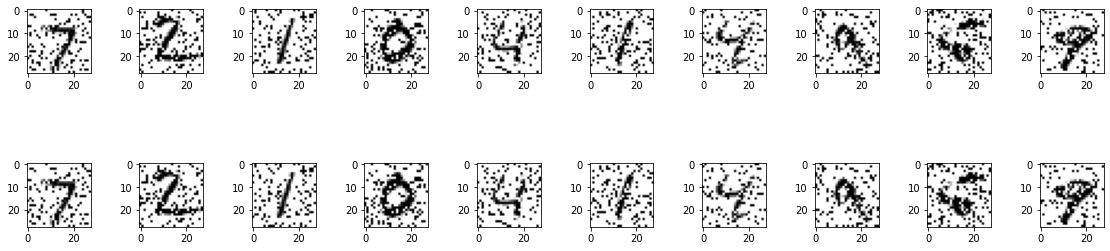

In [224]:
mnist_model_sp03.evaluate(test_images_noisy,  test_labels)
no_noise_img = mnist_model_sp03.predict(test_images_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")

plt.show()

# Attempt 8: poisson 5?

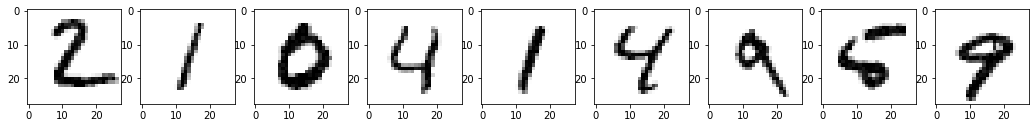

In [225]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize it to 0-1
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.
train_images = np.reshape(train_images, (len(train_images), 28, 28))
test_images = np.reshape(test_images, (len(test_images), 28, 28))

#adding some noise
from skimage.util import random_noise
train_images_noisy= random_noise(train_images, mode='poisson', seed = 1)
test_images_noisy = random_noise(test_images, mode='poisson', seed = 1)

#Clip all values to 0-1 [to stretch it]
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
plt.show()


In [226]:
mnist_model_possion1 = Sequential()
mnist_model_possion1.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
mnist_model_possion1.add(MaxPooling2D((2, 2),padding='same'))
mnist_model_possion1.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
mnist_model_possion1.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mnist_model_possion1.add(Flatten())
mnist_model_possion1.add(Dense(128, activation='linear'))
mnist_model_possion1.add(Dense(num_classes, activation='softmax'))

mnist_model_possion1.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

mnist_model_possion1.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_102 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_103 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_23 (Flatten)        (None, 3136)              0         
                                                                 
 dense_46 (Dense)            (None, 128)             

In [227]:
mnist_model_possion1.fit(train_images_noisy, train_labels, epochs=10, verbose=1,
                   validation_data=(test_images_noisy, test_labels), batch_size=128)

Epoch 1/10
469/469 [==============================] - 25s 53ms/step - loss: 27.3045 - accuracy: 0.0962 - val_loss: 27.2503 - val_accuracy: 0.0963
Epoch 2/10
469/469 [==============================] - 24s 51ms/step - loss: 27.3045 - accuracy: 0.0992 - val_loss: 27.2503 - val_accuracy: 0.0979
Epoch 3/10
469/469 [==============================] - 24s 51ms/step - loss: 27.3045 - accuracy: 0.1002 - val_loss: 27.2503 - val_accuracy: 0.1038
Epoch 4/10
469/469 [==============================] - 24s 50ms/step - loss: 27.3045 - accuracy: 0.1005 - val_loss: 27.2503 - val_accuracy: 0.0993
Epoch 5/10
469/469 [==============================] - 24s 50ms/step - loss: 27.3045 - accuracy: 0.0998 - val_loss: 27.2503 - val_accuracy: 0.1057
Epoch 6/10
469/469 [==============================] - 23s 50ms/step - loss: 27.3045 - accuracy: 0.0995 - val_loss: 27.2503 - val_accuracy: 0.1034
Epoch 7/10
469/469 [==============================] - 24s 50ms/step - loss: 27.3044 - accuracy: 0.1007 - val_loss: 27.2503 -

313/313 [==============================] - 1s 4ms/step - loss: 27.2503 - accuracy: 0.0990


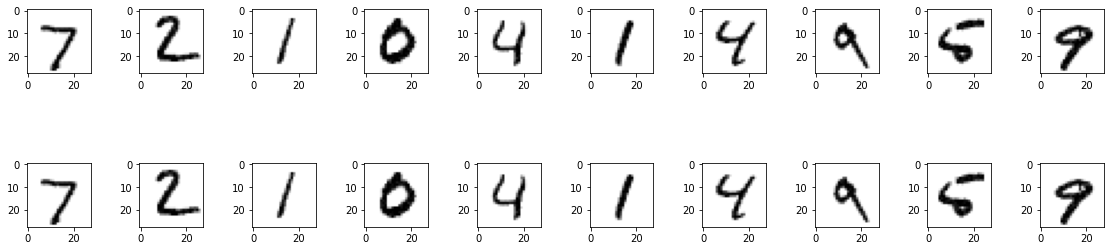

In [228]:
mnist_model_possion1.evaluate(test_images_noisy,  test_labels)
no_noise_img = mnist_model_possion1.predict(test_images_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")

plt.show()

# Attempt 9: salt and pepper, 0.3, Test accuracy: 0.09769999980926514

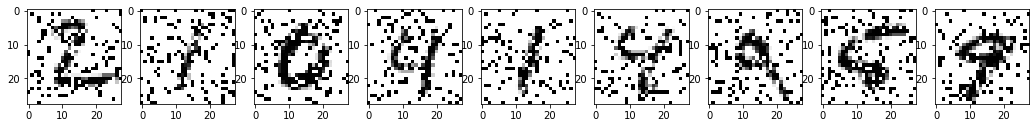

In [191]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize it to 0-1
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.
train_images = np.reshape(train_images, (len(train_images), 28, 28))
test_images = np.reshape(test_images, (len(test_images), 28, 28))

#adding some noise
from skimage.util import random_noise
train_images_noisy= random_noise(train_images, mode='s&p',amount=0.3)
test_images_noisy = random_noise(test_images, mode='s&p',amount=0.3)

#Clip all values to 0-1 [to stretch it]
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

In [192]:
mnist_model_sp03 = Sequential()
mnist_model_sp03.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
mnist_model_sp03.add(MaxPooling2D((2, 2),padding='same'))
mnist_model_sp03.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
mnist_model_sp03.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mnist_model_sp03.add(Flatten())
mnist_model_sp03.add(Dense(128, activation='linear'))
mnist_model_sp03.add(Dense(num_classes, activation='softmax'))

mnist_model_sp03.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

mnist_model_sp03.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_90 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_91 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 3136)              0         
                                                                 
 dense_34 (Dense)            (None, 128)             

In [193]:
mnist_model_sp03.fit(train_images_noisy, train_labels, epochs=10, verbose=1,
                   validation_data=(test_images_noisy, test_labels), batch_size=128)

Epoch 1/10
469/469 [==============================] - 23s 48ms/step - loss: 27.3046 - accuracy: 0.0989 - val_loss: 27.2503 - val_accuracy: 0.0955
Epoch 2/10
469/469 [==============================] - 25s 53ms/step - loss: 27.3045 - accuracy: 0.0988 - val_loss: 27.2503 - val_accuracy: 0.1011
Epoch 3/10
469/469 [==============================] - 25s 54ms/step - loss: 27.3044 - accuracy: 0.0988 - val_loss: 27.2503 - val_accuracy: 0.1035
Epoch 4/10
469/469 [==============================] - 27s 58ms/step - loss: 27.3044 - accuracy: 0.0982 - val_loss: 27.2503 - val_accuracy: 0.0990
Epoch 5/10
469/469 [==============================] - 26s 55ms/step - loss: 27.3045 - accuracy: 0.0983 - val_loss: 27.2503 - val_accuracy: 0.1009
Epoch 6/10
469/469 [==============================] - 27s 57ms/step - loss: 27.3045 - accuracy: 0.0983 - val_loss: 27.2503 - val_accuracy: 0.1005
Epoch 7/10
469/469 [==============================] - 23s 50ms/step - loss: 27.3044 - accuracy: 0.0976 - val_loss: 27.2503 -

313/313 [==============================] - 1s 5ms/step - loss: 27.2503 - accuracy: 0.0977


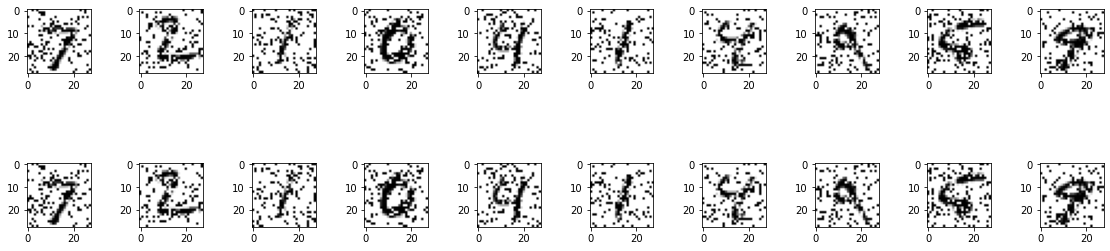

In [194]:

mnist_model_sp03.evaluate(test_images_noisy,  test_labels)
no_noise_img = mnist_model_sp03.predict(test_images_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")

plt.show()

In [195]:
test_eval = mnist_model_sp03.evaluate(test_images_noisy,  test_labels, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 27.25031280517578
Test accuracy: 0.09769999980926514


# Attempt 10: speckle, var=0.02,  accuracy: 0.0954

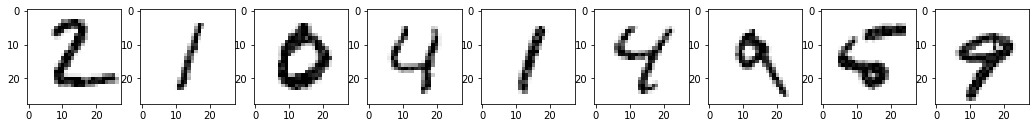

In [229]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize it to 0-1
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.
train_images = np.reshape(train_images, (len(train_images), 28, 28))
test_images = np.reshape(test_images, (len(test_images), 28, 28))

#adding some noise
from skimage.util import random_noise
train_images_noisy= random_noise(train_images, mode='speckle', var=0.02, clip=True)
test_images_noisy = random_noise(test_images, mode='speckle', var=0.02, clip=True)

#Clip all values to 0-1 [to stretch it]
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
plt.show()



In [230]:
mnist_model_speckle002 = Sequential()
mnist_model_speckle002.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
mnist_model_speckle002.add(MaxPooling2D((2, 2),padding='same'))
mnist_model_speckle002.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
mnist_model_speckle002.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mnist_model_speckle002.add(Flatten())
mnist_model_speckle002.add(Dense(128, activation='linear'))
mnist_model_speckle002.add(Dense(num_classes, activation='softmax'))

mnist_model_speckle002.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

mnist_model_speckle002.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_104 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_105 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_24 (Flatten)        (None, 3136)              0         
                                                                 
 dense_48 (Dense)            (None, 128)             

In [231]:

mnist_model_speckle002.fit(train_images_noisy, train_labels, epochs=10, verbose=1,
                   validation_data=(test_images_noisy, test_labels), batch_size=128)

Epoch 1/10
469/469 [==============================] - 24s 50ms/step - loss: 27.3045 - accuracy: 0.0952 - val_loss: 27.2503 - val_accuracy: 0.0943
Epoch 2/10
469/469 [==============================] - 23s 49ms/step - loss: 27.3045 - accuracy: 0.0962 - val_loss: 27.2503 - val_accuracy: 0.1012
Epoch 3/10
469/469 [==============================] - 24s 51ms/step - loss: 27.3045 - accuracy: 0.0963 - val_loss: 27.2503 - val_accuracy: 0.0964
Epoch 4/10
469/469 [==============================] - 23s 50ms/step - loss: 27.3045 - accuracy: 0.0970 - val_loss: 27.2503 - val_accuracy: 0.0993
Epoch 5/10
469/469 [==============================] - 24s 51ms/step - loss: 27.3044 - accuracy: 0.0990 - val_loss: 27.2503 - val_accuracy: 0.0943
Epoch 6/10
469/469 [==============================] - 24s 51ms/step - loss: 27.3045 - accuracy: 0.0981 - val_loss: 27.2503 - val_accuracy: 0.0989
Epoch 7/10
469/469 [==============================] - 24s 51ms/step - loss: 27.3045 - accuracy: 0.0992 - val_loss: 27.2503 -

313/313 [==============================] - 1s 5ms/step - loss: 27.2503 - accuracy: 0.0954


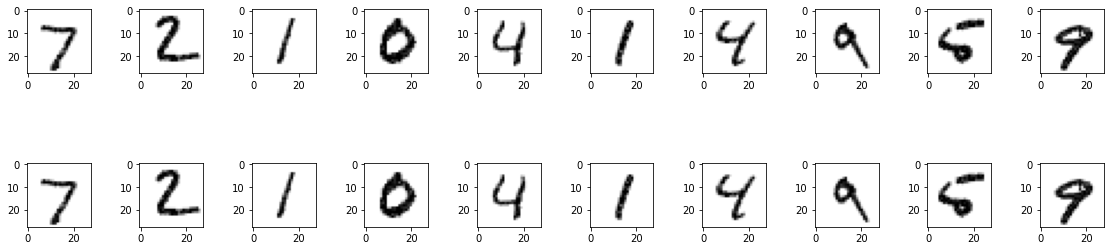

In [232]:

mnist_model_speckle002.evaluate(test_images_noisy,  test_labels)
no_noise_img =mnist_model_speckle002.predict(test_images_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")

plt.show()

# Attempt 11: speckle, seed=42, accuracy: 0.0968

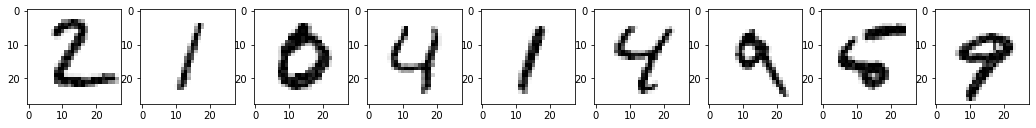

In [233]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize it to 0-1
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.
train_images = np.reshape(train_images, (len(train_images), 28, 28))
test_images = np.reshape(test_images, (len(test_images), 28, 28))

#adding some noise
from skimage.util import random_noise
train_images_noisy= random_noise(train_images, mode='speckle', seed=42)
test_images_noisy = random_noise(test_images, mode='speckle', seed=42)

#Clip all values to 0-1 [to stretch it]
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

In [234]:
mnist_model_speckle42 = Sequential()
mnist_model_speckle42.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
mnist_model_speckle42.add(MaxPooling2D((2, 2),padding='same'))
mnist_model_speckle42.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
mnist_model_speckle42.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mnist_model_speckle42.add(Flatten())
mnist_model_speckle42.add(Dense(128, activation='linear'))
mnist_model_speckle42.add(Dense(num_classes, activation='softmax'))

mnist_model_speckle42.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

mnist_model_speckle42.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_106 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_107 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_25 (Flatten)        (None, 3136)              0         
                                                                 
 dense_50 (Dense)            (None, 128)             

In [235]:
mnist_model_speckle42.fit(train_images_noisy, train_labels, epochs=10, verbose=1,
                   validation_data=(test_images_noisy, test_labels), batch_size=128)

Epoch 1/10
469/469 [==============================] - 23s 49ms/step - loss: 27.3045 - accuracy: 0.0996 - val_loss: 27.2503 - val_accuracy: 0.0977
Epoch 2/10
469/469 [==============================] - 23s 49ms/step - loss: 27.3044 - accuracy: 0.0991 - val_loss: 27.2503 - val_accuracy: 0.0976
Epoch 3/10
469/469 [==============================] - 23s 49ms/step - loss: 27.3044 - accuracy: 0.0989 - val_loss: 27.2503 - val_accuracy: 0.0930
Epoch 4/10
469/469 [==============================] - 23s 49ms/step - loss: 27.3045 - accuracy: 0.0997 - val_loss: 27.2503 - val_accuracy: 0.1020
Epoch 5/10
469/469 [==============================] - 23s 50ms/step - loss: 27.3045 - accuracy: 0.1005 - val_loss: 27.2503 - val_accuracy: 0.0958
Epoch 6/10
469/469 [==============================] - 23s 49ms/step - loss: 27.3045 - accuracy: 0.1013 - val_loss: 27.2503 - val_accuracy: 0.1013
Epoch 7/10
469/469 [==============================] - 23s 49ms/step - loss: 27.3045 - accuracy: 0.1001 - val_loss: 27.2503 -

313/313 [==============================] - 1s 4ms/step - loss: 27.2503 - accuracy: 0.0968


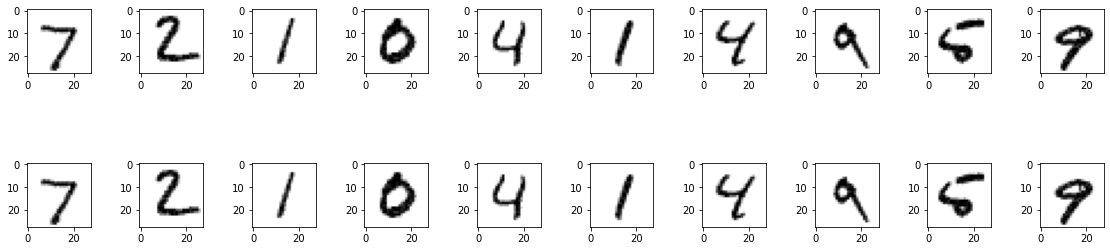

In [236]:

mnist_model_speckle42.evaluate(test_images_noisy,  test_labels)
no_noise_img = mnist_model_speckle42.predict(test_images_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")

plt.show()